<a href="https://colab.research.google.com/github/tamilselvan-sde/colab/blob/main/MNIST_with_CNN_to_understand_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.8431 - loss: 0.4984 - val_accuracy: 0.9841 - val_loss: 0.0529
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9752 - loss: 0.0845 - val_accuracy: 0.9862 - val_loss: 0.0392
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9804 - loss: 0.0658 - val_accuracy: 0.9893 - val_loss: 0.0305
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9843 - loss: 0.0504 - val_accuracy: 0.9888 - val_loss: 0.0345
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9908 - val_loss: 0.0236
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9885 - loss: 0.0360 - val_accuracy: 0.9923 - val_loss: 0.0219
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9919 - val_loss: 0.0234
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9911 - loss: 0.0296 - 

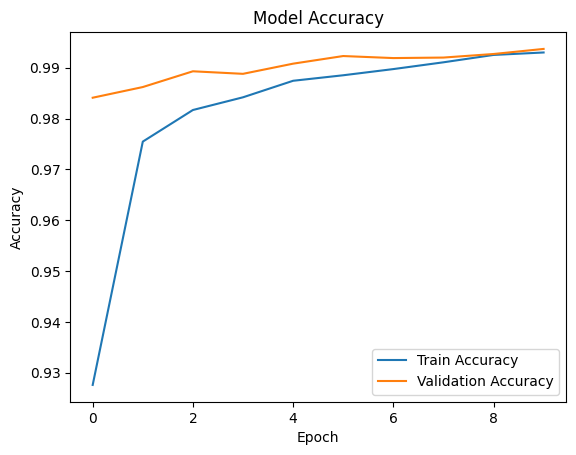

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


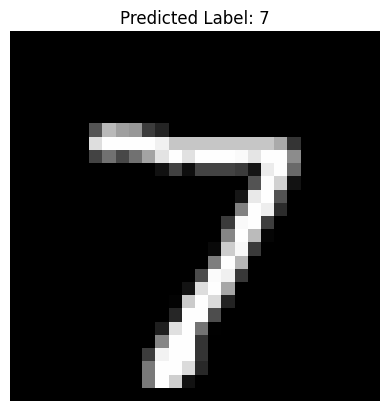

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Add channel dimension and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(x_test)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.axis('off')
plt.show()


In [ ]:
# Importing TensorFlow for building and training machine learning models
import tensorflow as tf

# Importing classes for building neural networks
from tensorflow.keras.models import Sequential  # Sequential model lets us stack layers in order
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Different layers for CNN

# Importing MNIST dataset (images of digits)
from tensorflow.keras.datasets import mnist  # Dataset of handwritten digits
from tensorflow.keras.utils import to_categorical  # Helps convert labels into a one-hot encoded format

# Importing matplotlib for visualization
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset (images and labels split into training and testing sets)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the image data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


# Preprocess the labels (output data)
y_train = to_categorical(y_train, 10)  # Convert labels into one-hot encoded format
y_test = to_categorical(y_test, 10)



In [ ]:
# Build the CNN model
model = Sequential([  # Sequential means stacking layers one after another
    # First convolutional layer: Detects patterns in images
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Conv2D applies 32 filters of size (3x3) to the input image
    # 'relu' helps the model learn complex patterns by introducing non-linearity
    # input_shape=(28, 28, 1) specifies the input size (28x28 grayscale images)

    # First max pooling layer: Reduces image size to make computations faster
    MaxPooling2D((2, 2)),
    # Takes the maximum value from each 2x2 block, reducing the image size by half
    # Example: 28x28 image becomes 14x14 after this step

    # Second convolutional layer: Learns more complex patterns
    Conv2D(64, (3, 3), activation='relu'),
    # Adds 64 filters of size (3x3) for deeper feature extraction

    # Second max pooling layer: Further reduces image size
    MaxPooling2D((2, 2)),
    # Example: 14x14 image becomes 7x7 after this step

    # Flatten layer: Converts the 2D feature maps into a 1D vector
    Flatten(),
    # Example: A 7x7x64 feature map becomes a single long vector of size 3136 (7*7*64)

    # Fully connected dense layer: Learns high-level patterns
    Dense(128, activation='relu'),
    # 128 neurons are used to process the high-level features from the previous layer
    # 'relu' helps the neurons activate only for meaningful patterns

    # Dropout layer: Prevents overfitting
    Dropout(0.5),
    # Randomly drops 50% of neurons during training to make the model more general (avoid overfitting)

    # Output layer: Makes the final prediction
    Dense(10, activation='softmax')
    # 10 neurons correspond to the 10 digit classes (0–9)
    # 'softmax' converts the output into probabilities for each class
])


### Short Notes for Understanding CNN Model:

1. **Sequential:** Stacks layers in order (step-by-step).

2. **Conv2D:**
   - Detects patterns (like edges, textures) in images.
   - 32 filters (3x3) are applied to scan the image.
   - **Activation (`relu`):** Focuses on meaningful patterns by ignoring negatives.

3. **MaxPooling2D:**
   - Reduces image size by keeping the most important features.
   - Example: Shrinks from 28x28 → 14x14 (first) → 7x7 (second).

4. **Flatten:**
   - Converts 2D data into 1D for the next layer.
   - Example: Turns a 7x7x64 feature map into a single vector.

5. **Dense (128 neurons):**
   - Processes high-level patterns to decide what the image represents.

6. **Dropout:**
   - Prevents overfitting by randomly ignoring 50% of neurons during training.

7. **Dense (Output, 10 neurons):**
   - Final layer, one neuron for each digit class (0–9).
   - **Softmax:** Outputs probabilities for each class.

### Real-world analogy:
- **Conv2D & MaxPooling2D:** Like scanning a book and focusing only on the important sentences.
- **Flatten & Dense:** Understanding those sentences and deciding what the book is about.
- **Dropout:** Avoids memorizing one book too much so it can generalize to others.
- **Softmax:** Gives the likelihood for each category (e.g., “90% sure it’s a 7”).

In [10]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer: Helps the model learn by adjusting weights
    loss='categorical_crossentropy',  # Loss function: Measures the difference between predicted and actual labels
    metrics=['accuracy']  # Metric: Tracks accuracy during training and evaluation
)


Here’s the code with comments and a short explanation:

```python
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer: Helps the model learn by adjusting weights
    loss='categorical_crossentropy',  # Loss function: Measures the difference between predicted and actual labels
    metrics=['accuracy']  # Metric: Tracks accuracy during training and evaluation
)
```

### Short Explanation:
1. **`optimizer='adam'`:**
   - Adam is a popular optimization algorithm that adjusts how the model learns by updating weights efficiently.
   - Think of it as a coach guiding the model to improve every step.

2. **`loss='categorical_crossentropy'`:**
   - Used for classification problems with multiple categories (like digits 0–9).
   - Measures how far off the model's predictions are from the true labels.

3. **`metrics=['accuracy']`:**
   - Tracks how often the model predicts the correct label (e.g., "How many times did it guess the digit right?").

### Real-world example:
- **Optimizer (Adam):** Like a coach helping players improve after every game.
- **Loss function:** Checks how well the team performed by comparing scores.
- **Accuracy:** The percentage of games the team won.

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,  # Training data (images and labels)
    validation_data=(x_test, y_test),  # Testing data for validation during training
    epochs=10,  # Number of times the model sees the entire training dataset
    batch_size=64  # Number of images processed at once in each step
)




Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9919 - val_loss: 0.0287
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9933 - val_loss: 0.0241
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9926 - val_loss: 0.0227
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9937 - val_loss: 0.0231
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9928 - val_loss: 0.0288
Epoch 6/10
274/938 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.9958 - loss: 0.0137

Here’s the code with comments and a short explanation:

```python
# Train the model
history = model.fit(
    x_train, y_train,  # Training data (images and labels)
    validation_data=(x_test, y_test),  # Testing data for validation during training
    epochs=10,  # Number of times the model sees the entire training dataset
    batch_size=64  # Number of images processed at once in each step
)
```

### Short Explanation:

1. **`x_train, y_train`:** Training data that the model uses to learn.
2. **`validation_data=(x_test, y_test)`:** Test data used to check the model's performance after each epoch (not used for training).
3. **`epochs=10`:** The model goes through the entire training dataset 10 times.
   - Example: Like reading the same book 10 times to memorize it better.
4. **`batch_size=64`:** The data is divided into chunks of 64 images for faster and efficient training.
   - Example: Instead of studying 1000 pages at once, break it into smaller groups (batches).

### Real-world analogy:
- Training a robot: It practices repeatedly (epochs), checks its mistakes after each practice session (validation), and processes smaller groups of data at a time (batch size).

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")



Here’s the code with comments and a short explanation:

```python
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
# Evaluates the model's performance on the test dataset
# Returns:
# - `test_loss`: How well the model's predictions match the true labels (lower is better)
# - `test_acc`: The accuracy of the model on the test data

# Print the test accuracy
print(f"Test accuracy: {test_acc:.4f}")  # Formats and displays the accuracy
```

### Short Explanation:
1. **`model.evaluate`:**
   - Tests the trained model on unseen data (`x_test` and `y_test`).
   - Measures how well the model generalizes to new data.
2. **`test_loss`:**
   - Shows how far the predictions are from the actual answers. Lower is better.
3. **`test_acc`:**
   - Displays the percentage of correct predictions on the test set.

### Real-world analogy:
- After training for a race (training phase), this step is like running the actual race (evaluation) to see how well you perform.
- **Loss:** Measures how many mistakes you made in the race.
- **Accuracy:** Shows the percentage of correct results (e.g., how often you got the right answer).

### Example Output:
If it prints `Test accuracy: 0.9876`, it means the model correctly classified ~98.76% of the test images.

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
# Predict on test data
predictions = model.predict(x_test)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Predict on a single test image
sample_image = x_test[0]  # Select the first test image
sample_image_reshaped = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Get the predicted class
predicted_class = model.predict(sample_image_reshaped).argmax()

# Visualize the test image with the prediction
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()
